In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('29kin20_3.jpg',0)

In [3]:
img_clp = img[0:550,250:800]
cv2.imwrite('trimmed.png', img_clp)

True

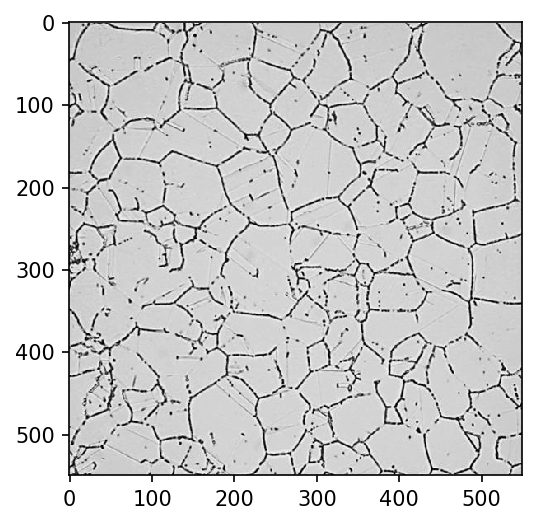

In [4]:
fig = plt.figure(dpi=150)
plt.imshow(img_clp)
plt.gray()

In [5]:
blur = cv2.GaussianBlur(img_clp,(5,5),0)
th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
cv2.imwrite('binary_adaptive.png',th)

True

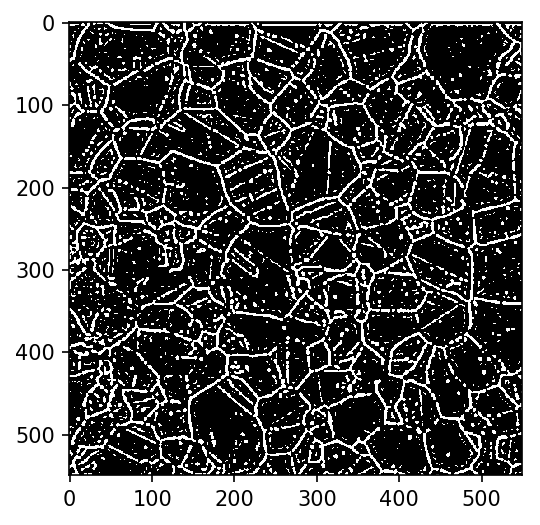

In [6]:
fig = plt.figure(dpi=150)
plt.imshow(th)
plt.gray()

In [19]:
__,contours,__ = cv2.findContours(th,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
img_cnt = cv2.cvtColor(img_clp,cv2.COLOR_GRAY2BGR) 
img_cnt = cv2.drawContours(img_cnt, contours, -1, (255,0,0), -1)

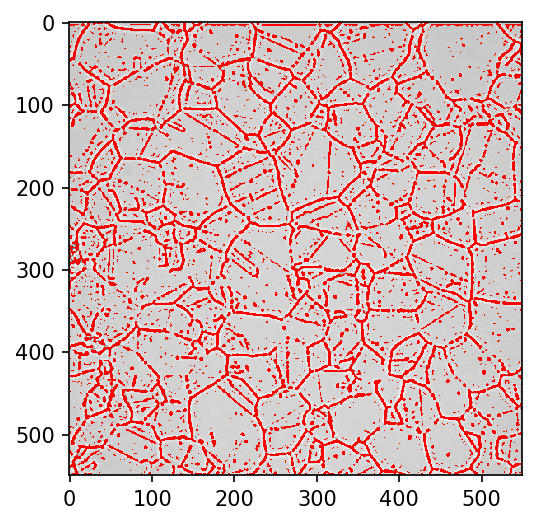

In [20]:
fig = plt.figure(dpi=150)
plt.imshow(img_cnt)

In [15]:
new_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if(area > 20):
        new_contours.append(cnt)

In [16]:
img_cnt = cv2.cvtColor(img_clp,cv2.COLOR_GRAY2BGR) 
img_res = np.zeros_like(img_cnt) 
img_res = cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)

img_cnt = cv2.drawContours(img_cnt, new_contours, -1, (255,0,0), -1)
img_res = cv2.drawContours(img_res, new_contours, -1, (255,255,255), -1)
cv2.imwrite('contours(2).png',img_cnt)

True

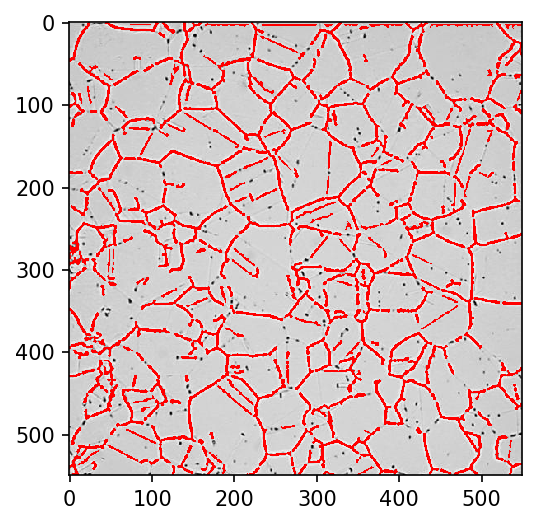

In [17]:
fig = plt.figure(dpi=150)
plt.imshow(img_cnt)

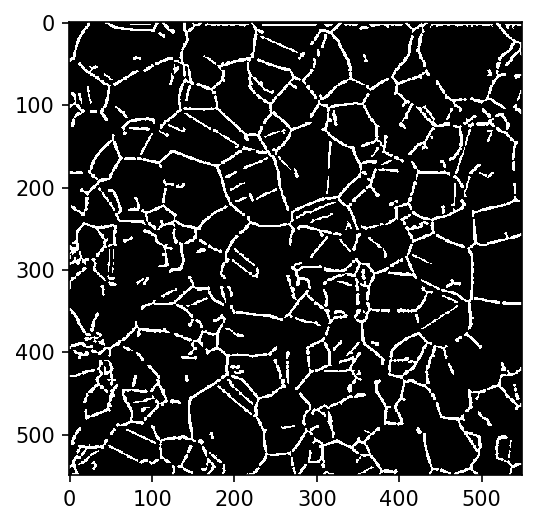

In [18]:
fig = plt.figure(dpi=150)
plt.imshow(img_res)